In [ ]:
%load_ext autoreload
%autoreload 2

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import rdkit.Chem.Draw.IPythonConsole
from IPython.display import SVG
import lxml.etree as ET
from src.config import filepaths
import svgutils.transform as st

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


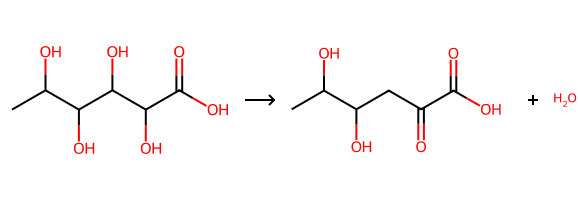

In [8]:
svg = SVG('/home/stef/quest_data/bottle/results/processed_expansions/241118_bottle_checkin/svgs/1.svg')
svg

In [ ]:
'''
Draw mol to svg with rdkit
Append stoich coefficient below w/ lxml
Stitch together mols, pluses and arrow w/ lxml & svgutils if necessary
'''

In [ ]:
def draw_mol_svg(smiles, stoich, hilite_atoms=None):
    fn = filepaths['artifacts'] / f"imgs/mols/{hash((smiles, stoich))}.svg"
    if os.path.exists(fn):
        pass
    else:
        mol = Chem.MolFromSmiles(smiles)
        
        if mol is None: # Catch MolFromSmiles troubles
            mol = Chem.MolFromSmiles(smiles, sanitize=False)

        nb = mol.GetNumAtoms()
        width = int(np.log10(nb) * 200) + 25
        d2d = Draw.MolDraw2DSVG(width, 200)

        if (stoich > 1) & (hilite_atoms is None):
            d2d.DrawMolecule(mol, legend=f"({stoich})", highlightAtoms=hilite_atoms)
        elif stoich > 1:
            d2d.DrawMolecule(mol, legend=f"({stoich})")
        elif (stoich == 1) & (hilite_atoms is None):
            d2d.DrawMolecule(mol)
        else:
            d2d.DrawMolecule(mol, highlightAtoms=hilite_atoms)
        
        d2d.FinishDrawing()
        fig = st.fromstring(d2d.GetDrawingText())
        fig.save(fn)
    
    return fn

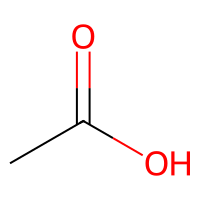

In [ ]:
def draw_molecule(smiles: str, stoich : int = 1, size: tuple = (200, 200), hilite_atoms : tuple = tuple()):
    '''
    Draw molecule.

    Args
    ----
    mol:str
        Molecule SMILES
    stoich:int
        Stoichiometric coefficient
    size:tuple
        (width, height)
     hilite_atoms:tuple
        Atom indices to highlight
    '''
    mol = Chem.MolFromSmiles(smiles)
    
    # Catch failed MolFromSmiles
    if mol is None: 
        mol = Chem.MolFromSmiles(smiles, sanitize=False)

    drawer = Draw.MolDraw2DSVG(*size)

    if stoich == 1:
        drawer.DrawMolecule(mol, highlightAtoms=hilite_atoms)
    else:
        drawer.DrawMolecule(mol, legend=f"({stoich})", highlightAtoms=hilite_atoms)
    
    drawer.FinishDrawing()
    img = drawer.GetDrawingText()

    return img



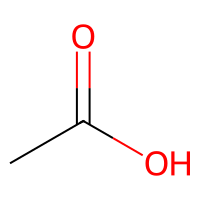

In [ ]:

elt = st.fromstring(mimg)
fig = st.SVGFigure(width=Unit(200), height=Unit(200))
root = elt.getroot()
fig.append(root)
fig.save('test.svg')
SVG('test.svg')

In [148]:
elt.height

'200px'

In [149]:
fig.width

'400.0px'

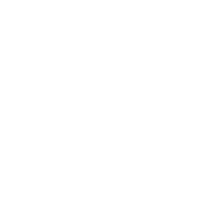

In [159]:
SVG(fig.to_str())

In [82]:
from collections import Counter

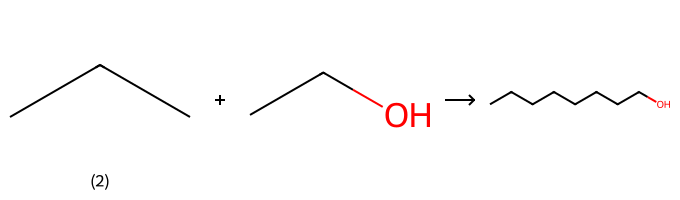

In [ ]:


    


def draw_reaction(rxn_sma: str, plus: st.SVGFigure, arrow: st.SVGFigure):
 
    reactants, products = [Counter(elt.split('.')) for elt in rxn_sma.split('>>')]

    movex = 0
    rxn_img = st.SVGFigure()
    def _add_elt(elt, movex, rxn_img):
        root = elt.getroot()
        root.moveto(movex, 0)
        rxn_img.append(root)
        movex += int(elt.width.strip('px'))
        return rxn_img, movex
    
    for i, (smi, stoich) in enumerate(reactants.items()):
        img = draw_molecule(smi, stoich)
        elt = st.fromstring(img)
        rxn_img, movex = _add_elt(elt, movex, rxn_img)

        if i < len(reactants) - 1:
            elt = plus
            rxn_img, movex = _add_elt(elt, movex, rxn_img)

    elt = arrow
    rxn_img, movex = _add_elt(elt, movex, rxn_img)

    for i, (smi, stoich) in enumerate(products.items()):
        img = draw_molecule(smi, stoich)
        elt = st.fromstring(img)
        rxn_img, movex = _add_elt(elt, movex, rxn_img)

        if i < len(products) - 1:
            elt = plus
            rxn_img, movex = _add_elt(elt, movex, rxn_img)

    height = float(elt.height.strip('px')) # Assumed same for all elements
    rxn_img.width = Unit(movex)
    rxn_img.height = Unit(height)

    rxn_img.save('test.svg')
    return rxn_img.to_str()

smi = 'CC(=O)O'
mimg = draw_molecule(smi)
SVG(mimg)
plus = st.fromfile(filepaths['artifacts'] / 'plus.svg')
arrow = st.fromfile(filepaths['artifacts'] / 'arrow.svg')
rxn_sma = 'CCC.CCC.CCO>>CCCCCCCCO'
fig = draw_reaction(rxn_sma, plus, arrow)
SVG(fig)

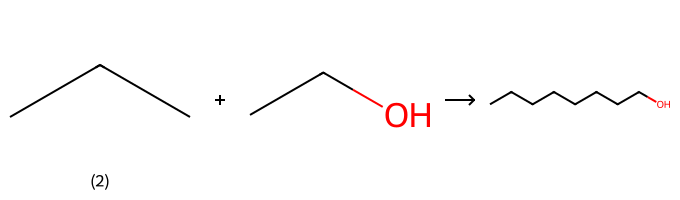

In [180]:
SVG('test.svg')